In [23]:
import math
import pandas as pd
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from matplotlib import pyplot as plt
from scipy.stats import t
import seaborn as sns

In [24]:
df = pd.read_csv('telco.csv', sep='	')

1. Have a closer look at the definitions of the variables and analyze which of them might
require a separate treatment. Consider for example the variable ed. There are two
possibilities how the variable ed can be included into the model (one with dummy
variables, the other one without dummies). Think about these two approaches and
suggest which approach is more appropriate. Motivate your decision.

1) Categorical variable "Ed" has 5 outputs. We can introduce it in 2 ways: 
- By one nominal variable (by encoding categories in range from 1 to 5).
- or by dummy variables (we should include in our model only 4 out of 5 in order to avoid multicolinearity).
First approach is not very good, because we would not be able to cath the diffrence of the effect's weights between categories, because we have set this difference by default to 1 and those weights would not have meaning. But we can use this nominal variable for overal testing of "ed" significance in the model. So I will introduce this both approaches.

In [25]:
#Encoding Nominal Variable 
def label_ed(row):
    if row['ed'] == df['ed'].unique()[0]:
        return 1
    if row['ed'] == df['ed'].unique()[1]:
        return 2
    if row['ed'] == df['ed'].unique()[2]:
        return 3
    if row['ed'] == df['ed'].unique()[3]:
        return 4
    if row['ed'] == df['ed'].unique()[4]:
        return 5
    
df['ed_cat']  = df.apply(lambda row: label_ed(row), axis=1)

In [26]:
# Creating set of dummies*:
def label_ed(row):
    if row['ed'] == df['ed'].unique()[0]:
        return 0
    if row['ed'] == df['ed'].unique()[1]:
        return 1
    if row['ed'] == df['ed'].unique()[2]:
        return 0
    if row['ed'] == df['ed'].unique()[3]:
        return 0
    if row['ed'] == df['ed'].unique()[4]:
        return 0
    
df['ed_Dummy2']  = df.apply(lambda row: label_ed(row), axis=1)

def label_ed(row):
    if row['ed'] == df['ed'].unique()[0]:
        return 0
    if row['ed'] == df['ed'].unique()[1]:
        return 0
    if row['ed'] == df['ed'].unique()[2]:
        return 1
    if row['ed'] == df['ed'].unique()[3]:
        return 1
    if row['ed'] == df['ed'].unique()[4]:
        return 0
    
df['ed_Dummy3']  = df.apply(lambda row: label_ed(row), axis=1)

def label_ed(row):
    if row['ed'] == df['ed'].unique()[0]:
        return 0
    if row['ed'] == df['ed'].unique()[1]:
        return 0
    if row['ed'] == df['ed'].unique()[2]:
        return 0
    if row['ed'] == df['ed'].unique()[3]:
        return 1
    if row['ed'] == df['ed'].unique()[4]:
        return 0
    
df['ed_Dummy4']  = df.apply(lambda row: label_ed(row), axis=1)


def label_ed(row):
    if row['ed'] == df['ed'].unique()[0]:
        return 0
    if row['ed'] == df['ed'].unique()[1]:
        return 0
    if row['ed'] == df['ed'].unique()[2]:
        return 0
    if row['ed'] == df['ed'].unique()[3]:
        return 0
    if row['ed'] == df['ed'].unique()[4]:
        return 1
    
df['ed_Dummy5']  = df.apply(lambda row: label_ed(row), axis=1)

# def label_ed(row):
#     if row['ed'] == df['ed'].unique()[0]:
#         return 1
#     if row['ed'] == df['ed'].unique()[1]:
#         return 0
#     if row['ed'] == df['ed'].unique()[2]:
#         return 0
#     if row['ed'] == df['ed'].unique()[3]:
#         return 0
#     if row['ed'] == df['ed'].unique()[4]:
#         return 0
    
# df['ed_Dummy1']  = df.apply(lambda row: label_ed(row), axis=1)

Remark:
* I have run the function abowe throught lambda for each Dummy separatelly.

input: df.columns.tolist()

output: ['tenure',  'age',  'marital',  'address',  'income', 'ed', 'employ', 'retire', 'gender', 'longmon', 'wiremon', 'churn', 'ed_cat', 'ed_Dummy1', 'retire1', 'marital1', 'gender1', 'churn1',   'pred', 'resid', 'ed_Dummy2', 'ed_Dummy3', 'ed_Dummy4', 'ed_Dummy5']

Then we should encode other categorical variables to numerical format.

1) if retired - 1, if not - 0;  

2) if married - 1, if not - 0; 

3) gender: male  - 1, if female - 0; 

4) churn: yes  - 1, if no - 0.

In [27]:
df['retire1'] = np.where(df['retire']=='No', 0, 1)
df['marital1'] = np.where(df['marital']=='Married', 1, 0)
df['gender1'] = np.where(df['gender']=='Male', 1, 0)
df['churn1'] = np.where(df['churn']=='Yes', 1, 0)

2.Consider now the dependent variable and the interval (metric) scaled explanatory
variables. Plot these data and decide if you wish to transform these x-variables and if
there is a need to transform the y variable. You can also use some measure of skewness
to decide about y. The variable wiremon shows a very specific pattern. How would
you take it into account?

tenure


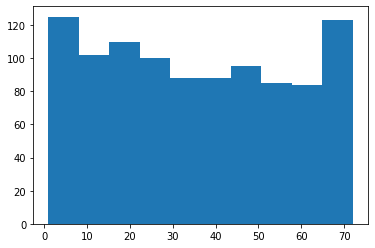

age


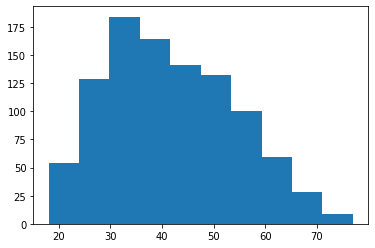

marital


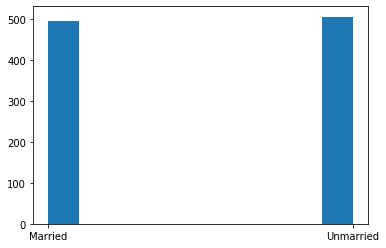

address


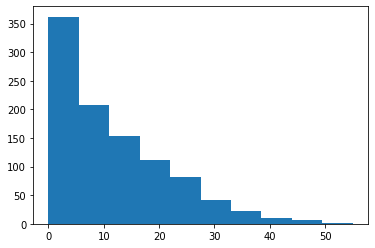

income


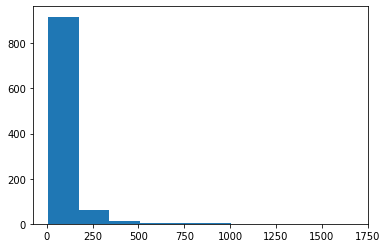

ed


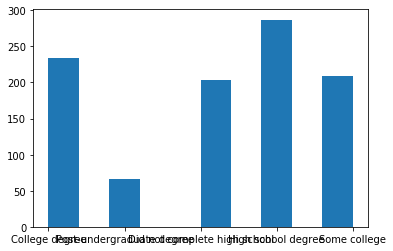

employ


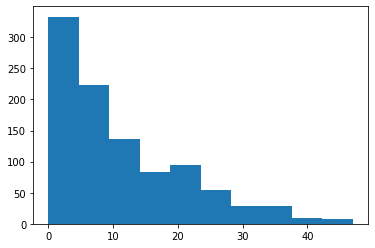

retire


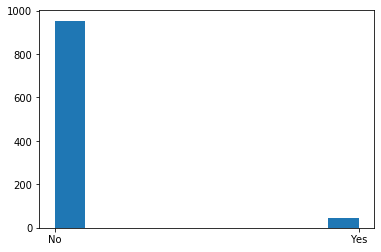

gender


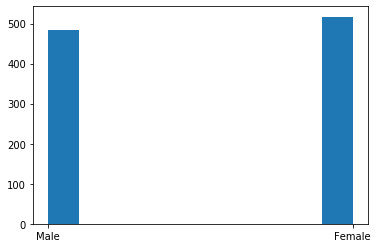

longmon


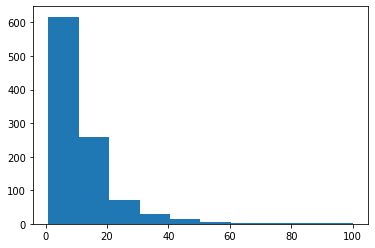

wiremon


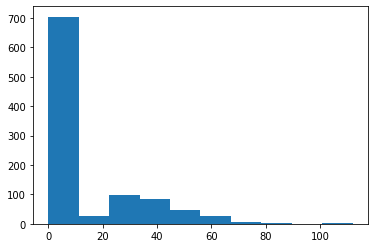

churn


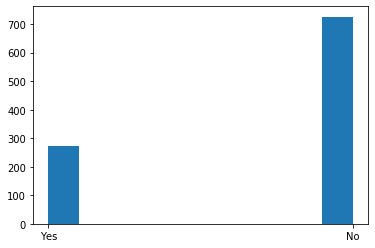

ed_cat


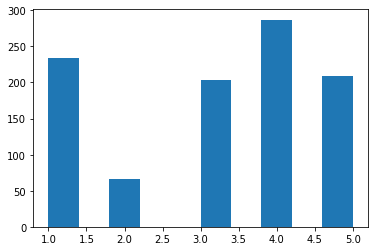

ed_Dummy2


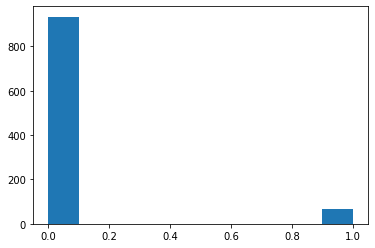

ed_Dummy3


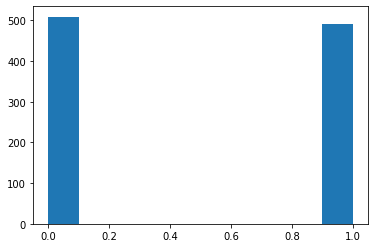

ed_Dummy4


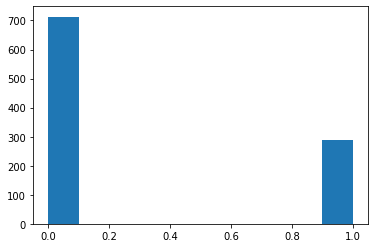

ed_Dummy5


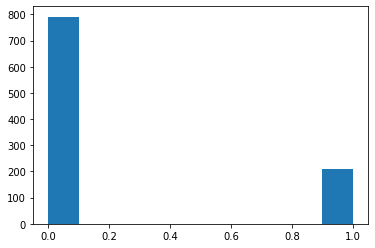

retire1


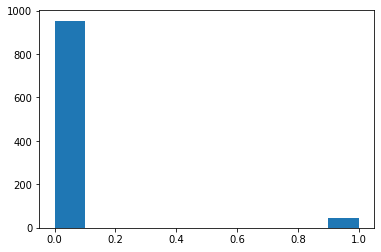

marital1


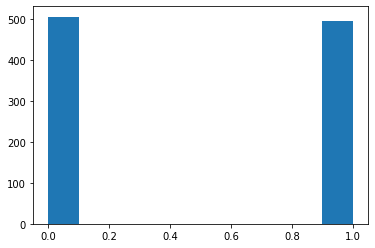

gender1


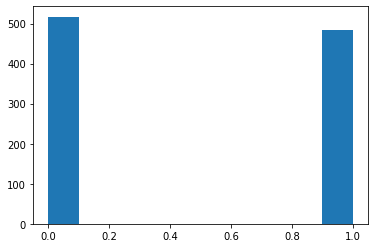

churn1


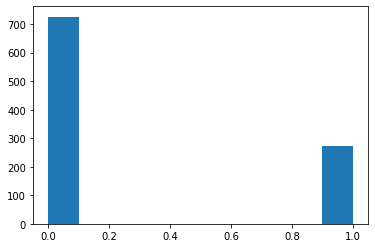

In [28]:
#2 Lets plot the features
for feature in df.columns.tolist():
    print(feature)
    plt.hist(df[feature])
    plt.show()

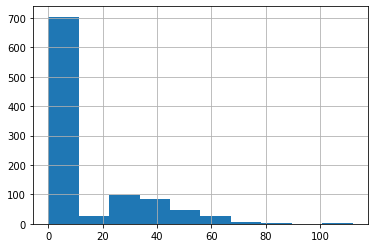

In [29]:
df['wiremon'].hist()

From the graphs above we see that distribution of the dependent variable 'longmon' is skewed to the right. Lets take log of it. We should also take in account that in this case predictions of log could turn negative.

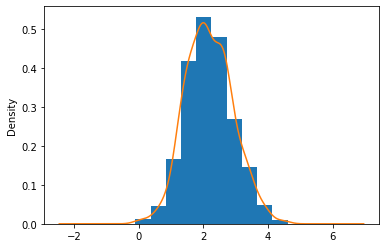

In [30]:
import math
df['longmon_l'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.log(x))
df['longmon_l'].plot(kind='hist', density=True)
df['longmon_l'].plot(kind='kde')

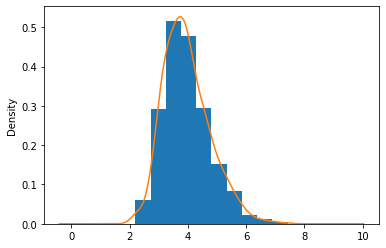

In [31]:
# The same issue with variable "income"
df['income_l'] = df['income'].apply(lambda x: 0 if x ==0 else math.log(x))
df['income_l'].plot(kind='hist', density=True)
df['income_l'].plot(kind='kde')

On the graphs above distributions of "longmon" and "income" seems like t-distribution, which much more close to normal distribution than previous one. 

Te same situation was with distribution of "employ", but log transformation did not help there. Transformed variables aproximatelly could be counted as binary.
But "power_to 1/3" transhormation helped a little

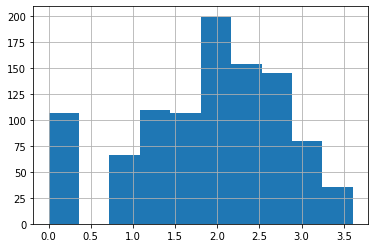

In [32]:
# df['employ_l'] = df['employ'].apply(lambda x: 0 if x ==0 else math.log(x))
df['employ_t'] = df['employ'].apply(lambda x: 0 if x ==0 else (x**(1/3)))
df['employ_t'].hist()

In [33]:
# df.drop('employ_t',axis=1, inplace=True)

"Wiremon" seems very wierd.
We can try to take log of it or apply cox-box. But as we see from the graphs below nor of these approaches had helped. So lets run regression and see significance of this model. 

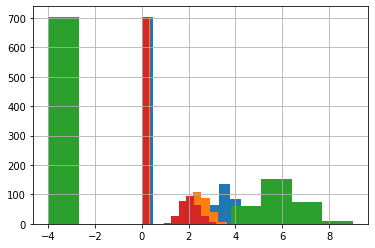

In [34]:
#Log transformation
df['wiremon_l'] = df['wiremon'].apply(lambda x: 0 if x ==0 else math.log(x))
df['wiremon_l'].hist()

# Power 1/3 transporrmation for right-skewed 
df['wiremon_t'] = df['wiremon'].apply(lambda x: 0 if x ==0 else math.log(x**1/3))
df['wiremon_t'].hist()

# Cox-box
from scipy.special import boxcox
boxcox(df['wiremon'], .25).hist()

# Z-score normalization
df['wiremon_t'] = df['wiremon'].apply(lambda x: 0 if x ==0 else math.log((x- df['wiremon_l'].min())/(df['wiremon_l'].max() - df['wiremon_l'].min())))
df['wiremon_t'].hist()

In [35]:
# df.drop('wiremon_t',axis=1, inplace=True)
# df.drop('wiremon_l',axis=1, inplace=True)

Lets have a look what is the visual relationship between dependent and independent variables.

tenure


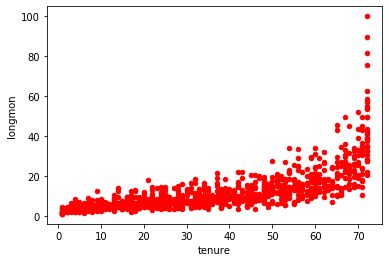

age


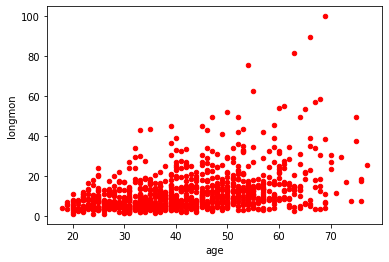

marital
address


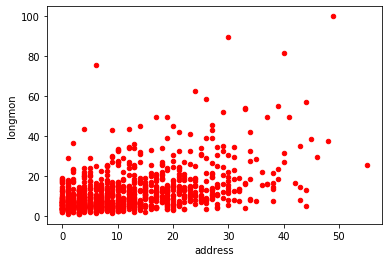

income


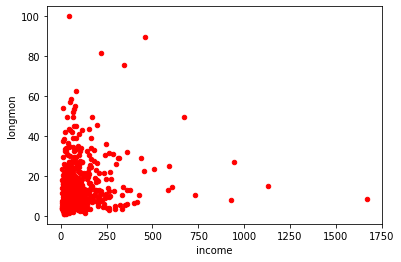

ed
employ


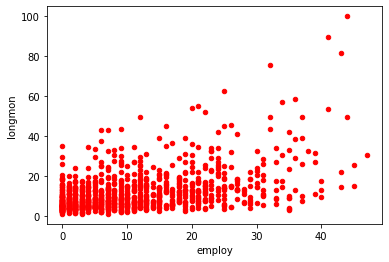

retire
gender
longmon


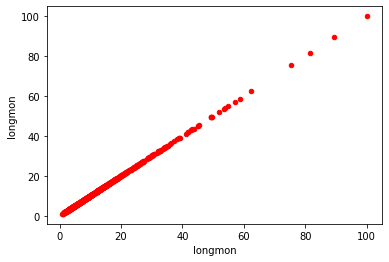

wiremon


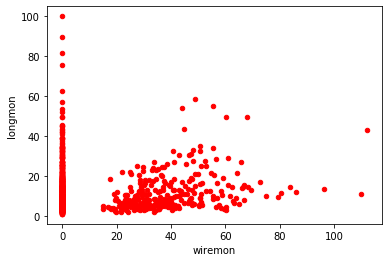

churn
ed_cat


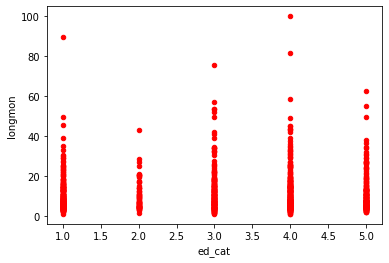

ed_Dummy2


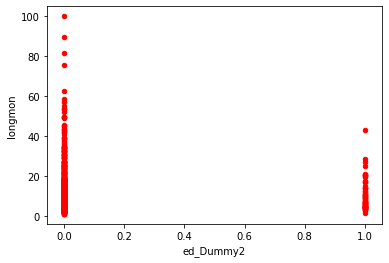

ed_Dummy3


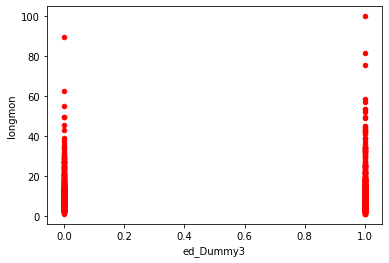

ed_Dummy4


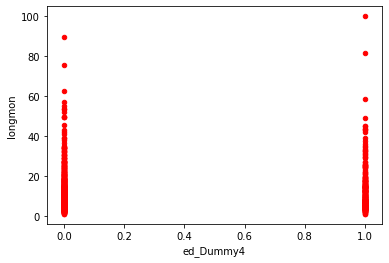

ed_Dummy5


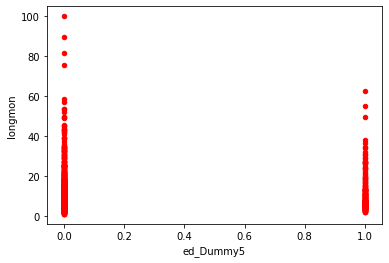

retire1


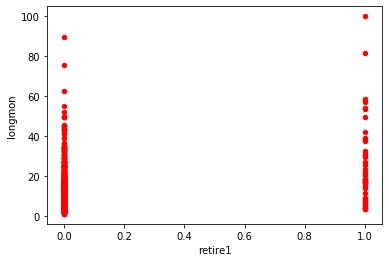

marital1


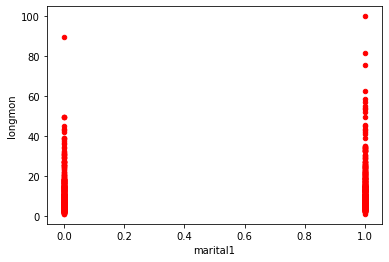

gender1


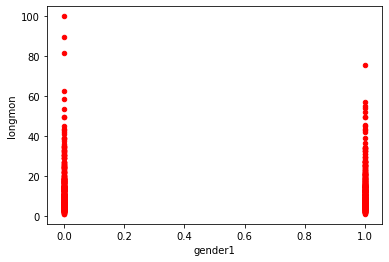

churn1


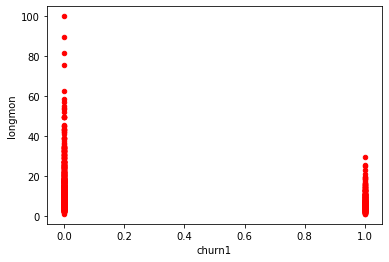

longmon_l


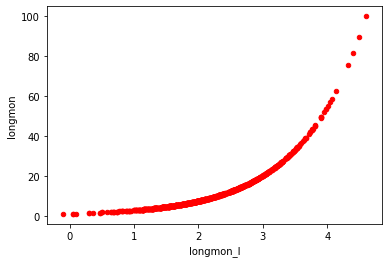

income_l


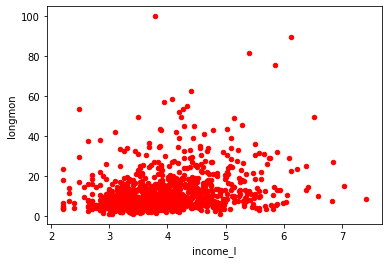

employ_t


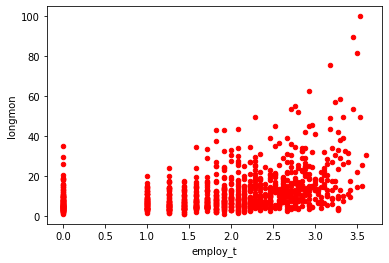

wiremon_l


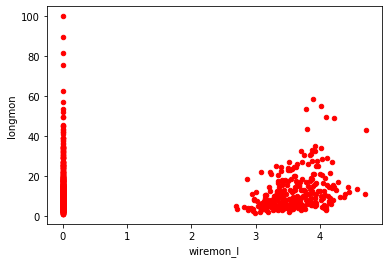

wiremon_t


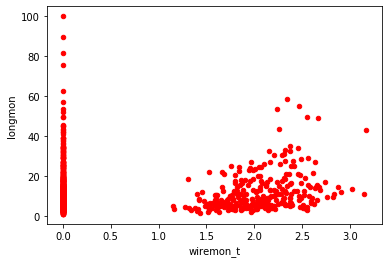

In [36]:
for feature in df.columns.tolist():
    try:
        print(feature)
        df.plot(kind='scatter',x=feature,y='longmon',color='red')
        plt.show()
    except:
        pass

In [37]:
explanatory_vars = df.columns.tolist()
remove = ['longmon','marital','ed','retire', 'gender', 'churn']
for i in remove:
    explanatory_vars.remove(i)

explanatory_vars =['tenure', 'age', 'address', 'income','employ', 'wiremon', 'ed_cat', 'ed_Dummy2', 'ed_Dummy3', 'ed_Dummy4', 'ed_Dummy5', 'retire1', 'marital1', 'gender1', 'churn1']   
 

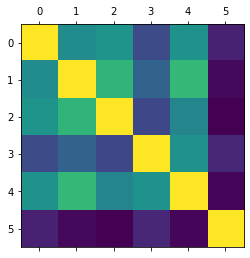

In [38]:
explanatory_vars =['tenure', 'age', 'address', 'income','employ', 'wiremon']   
plt.matshow((df[explanatory_vars]).corr())
plt.show()

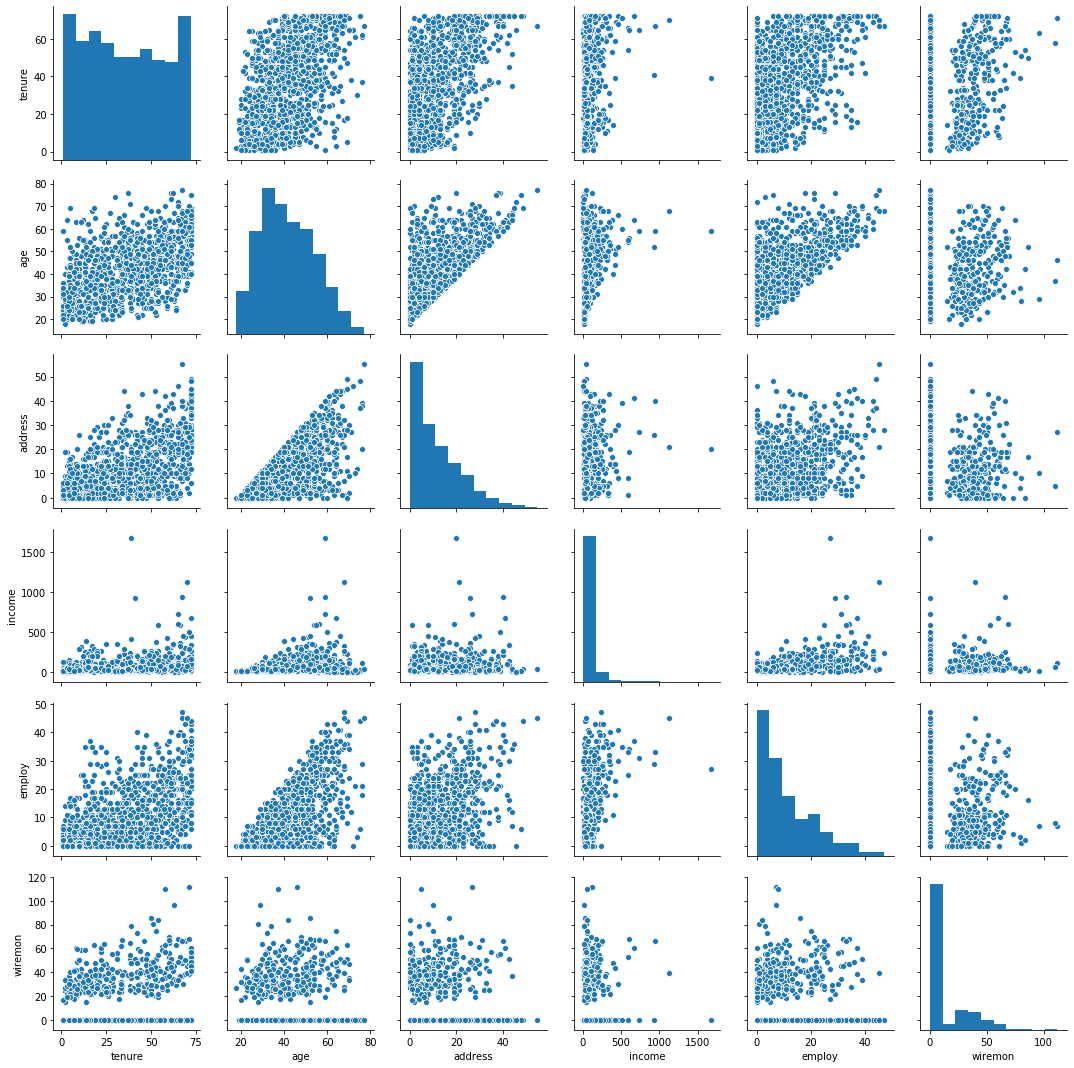

In [39]:
sns.pairplot(df[explanatory_vars])

3. After making up your decision about the above two problems run a simple linear
regression. Pick up one of the regressors. Write down the corresponding hypothesis of
the t-test. Provide the formula for the test statistics, explain the components of the
formula and give the values for this components. Evaluate the goodness of the model.
Explain in your own words the difference between R 2 and adjusted R 2 .

In [40]:
explanatory_vars =['tenure', 'age', 'address', 'income', 'employ', 'wiremon', 'ed_Dummy2', 'ed_Dummy3', 'ed_Dummy4', 'ed_Dummy5', 'retire1', 'marital1', 'gender1', 'churn1']

In [41]:
import statsmodels.api as sm 
   
X = df[explanatory_vars] 
y = df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X)

# model0 = model  # save this model for future
model.summary()


/home/ky/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          7.72e-163
Time:                        18:42:31   Log-Likelihood:                -3350.2
No. Observations:                1000   AIC:                             6730.
Df Residuals:                     985   BIC:                             6804.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4931      1.126      2.215      0.027       0.284       4.702
tenure         0.2948      0.014     21.252      0.000       0.268       0.322
age           -0.1238      0.029     -4.220      0.000      -0.181      -0.066
address        0.1404      0.031      4.577      0.000       0.080       0.201
income        -0.0002      0.003     -0.079      0.937      -0.005       0.005
employ         0.1644      0.036      4.624      0.000       0.095       0.234
wiremon       -0.0041      0.012     -0.339      0.735      -0.028       0.020
ed_Dummy2     -1.2492      0.973     -1.283      0.200      -3.159       0.661
ed_Dummy3     -1.5580      0.735     -2.121      0.034      -3.000      -0.116
ed_Dummy4      1.3752      0.651      2.111      0.035       0.097       2.654
ed_Dummy5     -0.6512      0.673     -0.968      0.333      -1.971       0.669
retire1        7.6793      1.212      6.335      0.000       5.300      10.058
marital1       1.0519      0.452      2.327      0.020       0.165       1.939
gender1        0.4151      0.443      0.936      0.349      -0.455       1.285
churn1         0.2107      0.545      0.387      0.699      -0.859       1.281
==============================================================================
Omnibus:                      709.767   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17574.523
Skew:                           2.924   Prob(JB):                         0.00
Kurtosis:                      22.687   Cond. No.                         844.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets choose 'age'. If we re-run regression on only this independent variable, we would see if there is a significant linear relationship between the independent variable X and the dependent variable Y. If there is, the slope will not equal zero. The null hypothesis states that the slope is equal to zero, and the alternative hypothesis states that the slope is not equal to zero. "H0: beta = 0" and alternativelly "H1: beta != 0".
In case we include one variable in regression we could calculate -t-statistics manually, but for multiple regression it will be much more complicated, so I will just pick up statistics from the summary above.

for t-statistics calculation we should:

1) find standard errors 

SE = sqrt [ Σ(yi - ŷi)2 / (n - 2) ] / sqrt [ Σ(xi - x)2 ] 

we can pick up it from the table above, SE = 0.029.

and coeficcient under 'age' = -0.1238.

2) find degress of freedom and based on them critical value from the table

DF = n - q-ty of variables = 1000 - 16 = 984
critical value = 2.33

3) Valculate t-statistics and compare it with t-value

t = beta/SE = -0.1086/0.029 = -4.27 < -2.33 
we can not accept H0, so coefficient underr 'age' is not zero


In [42]:
df_se = pd.DataFrame(model.bse).reset_index()
df_se = df_se.rename(columns={'index': "param", 0: "se"})
df_param = pd.DataFrame(model.params).reset_index()
df_param = df_param.rename(columns={'index': "param", 0: "coef"})
df_param = df_param.merge(df_se)
df_param
del(df_se)
beta = df_param.loc[df_param['param'] == 'age']['coef']
se  = df_param.loc[df_param['param'] == 'age']['se']

print('beta under age: ', float(beta), ' with SE: ', float(se))

beta under age:  -0.12376920747942835  with SE:  0.02932884817700734


In [44]:
# Calculate t-stat
t_stat = beta/se
print('t-stat for "age": ', float(t_stat))

# Calculate DF
degrees_of_freedom =  1000 - len(explanatory_vars)
print("DF",degrees_of_freedom)

# Find critical value
alpha = 0.01
crit_value = t.ppf(1 - alpha, df=984) 

print("crit.value", crit_value)

if (abs(float(t_stat)) > abs(float(crit_value))):
    print('coef "age" is significant with  abs t-stat ', abs(float(t_stat)), " and critical value of ", float(crit_value))
else:
    print('coef "age" is not significant with abs t-stat ', abs(float(t_stat)), " and critical value of ", float(crit_value))


t-stat for "age":  -4.220050058987947
DF 986
crit.value 2.330143497962805
coef "age" is significant with  abs t-stat  4.220050058987947  and critical value of  2.330143497962805


R-squared is the explained variance of the response by the predictors.Meaning of Adjusted R2 Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable. 

4. Compute manually the predicted values from the above regression and the residuals.
Make two plots: residuals vs. true y’s and predicted y’s vs. true y’s. What do you
expect in both cases and why? Do the obtained figures support your expectations?

In [45]:
X = df[explanatory_vars] 
y = df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X)
residuals = model.resid

In [46]:
# pd.DataFrame(model.params)

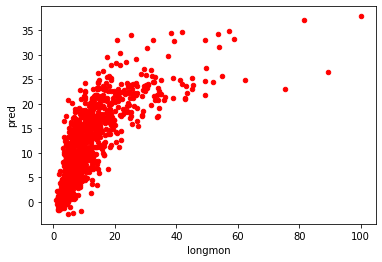

In [47]:
# Pot y-predivted vs y
df['pred'] = model.predict(X)
df.plot(kind='scatter',x='longmon',y='pred',color='red')
plt.show()

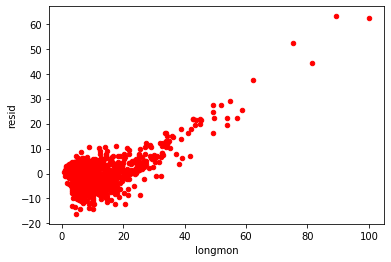

In [48]:
# Pot residuals vs y
df['resid'] = df['longmon'] - df['pred']
df.plot(kind='scatter',x='longmon',y='resid',color='red')
plt.show()

The graphs above shows that our model is not precise. The slope coefficient on the graph y / y-predicted is higher than 1. Rsiduals are not distributed normally. But it was expected as our R2 is only 0.55. 
Most of residuals are small, but there are several completelly wrong predictions.

5. If you wish to argue that education is insignificant and use the model with dummies
than you have to check the simultaneous insignificance of all dummies which stem from
the factor variable ed. Run a test for general linear hypothesis and conclude about the
significance of ed. Write down the matrix and the vector needed in the hypothesis.

We can re-run regression using our nominal variable instead set of Dummies. And have a look on it's significance. Beacuse matrix of A dummy looks like:

[i, d1 , d2, d3, d4 ]

where i = d1 + d2 + d3 + d4

In [49]:
explanatory_vars = ['tenure',  'age', 'address', 'income', 'employ', 'wiremon', 'ed_Dummy2', 'ed_Dummy3', 'ed_Dummy4', 'ed_Dummy5', 'retire1', 'marital1', 'gender1', 'churn1']

In [50]:
explanatory_vars = ['tenure',  'age', 'address', 'income', 'employ', 'wiremon', 'ed_Dummy2', 'ed_Dummy3', 'ed_Dummy4', 'ed_Dummy5', 'retire1', 'marital1', 'gender1', 'churn1']
A = np.zeros((4,15), dtype=int)
A[0,8] =1 
A[1,9] =1
A[2,10] =1
A[3,11] =1
A

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [51]:
X = df[explanatory_vars] 
y = df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit()

In [52]:
# F-test
# A = np.identity(len(model.params))
# A = A[1:,:]
print(model.f_test(A))

<F test: F=array([[11.90988519]]), p=1.8737625634887874e-09, df_denom=985, df_num=4>


P value < 0.05 => we reject the null hypothesis and each coefficient under Dummy is jointly statistically significantly different from zero.

We can also re-run regression without "ed" and then compare F-statistics of the moth models

In [58]:
# DELETE EDUCATION VARIABLE AND RE-RUN REGRESSION

explanatory_vars_wo_ed = ['tenure',  'age', 'address', 'income', 'employ', 'wiremon', 'retire1', 'marital1', 'gender1', 'churn1']

X_wo_ed = df[explanatory_vars_wo_ed] 
y = df['longmon'] 
X_wo_ed = sm.add_constant(X_wo_ed) 

model_wo_ed = sm.OLS(y, X_wo_ed.astype(float)).fit()
predictions = model_wo_ed.predict(X_wo_ed)

In [66]:
# F-test for comparison of these 2 models
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))

B = np.identity(len(model_wo_ed.params))
B = B[1:,:]
print(model_wo_ed.f_test(B))

<F test: F=array([[111.35064771]]), p=1.836565685333779e-164, df_denom=988, df_num=11>
<F test: F=array([[122.58745931]]), p=1.6976429423530512e-165, df_denom=989, df_num=10>


In [153]:
df['ed'].unique()

array(['College degree', 'Post-undergraduate degree',
       'Did not complete high school', 'High school degree',
       'Some college'], dtype=object)

6. Provide an economic interpretation for the parameters of address, ed, and retire.
Neglect the possible insignificance and keep in mind possible transformations of the variables.

'address' - years at the current address 
the quantity of years that person spent on the stated address. We may suggest the lower is the score, the more likely person will use long distance calls, as it may have moved from other places. To catch this effect I run the regression below with introduced square of this variable. But from summary we can see that address variable become insignificant. Also the obtained coefficient under transformed variable is not significant. 

With 1 additional year of residence at current address person increase usage of the long distance call by  	0.1404, assuming all other parametres remains the same.

'ed' education (5 categories: Did not complete high school; High school degree; Some college; College degree; Post-undergraduate degree)
 Education may stand also for the quanity of connections, that the person has (the people that he/she had met while studying). 

We see that coefficients under regressed dummies are negative, that means that all the categories under those Dummies will use long call less than basic category. Interpretation is the follows:

Usage of  the long calls by person with 'Post-undergraduate degree' will be shotter by -1.2492 in comparison with basic category of people, that have 'College degree' remains all over variables the same.

The same for other dummies: 
- usage of  the long calls by person with 'Did not complete high school' will be shotter by -1.5580  in comparison with basic category of people, that have 'College degree' remains all over variables the same.

- usage of  the long calls by person with 'High school degree' will be shotter by -0.1827  in comparison with basic category of people, that have 'High school degree' remains all over variables the same.

- usage of  the long calls by person with 'Some college' will be shotter by -0.6512  in comparison with basic category of people, that have 'High school degree' remains all over variables the same.

Interpretation of variable 'retired': if the person is retire the time of usage of long distance calls will increase by 7.6793, assuming all other parametres remains the same. 


In [154]:
# # testing the convex effect of the address: adress + adress**2

# df['address_sq'] = df['address']**2

# explanatory_vars =['tenure', 'age', 'address', 'address_sq', 'income', 'employ', 'wiremon', 'retire1', 'marital1', 'gender1', 'churn1']

# X = df[explanatory_vars] 
# y = df['longmon'] 
# X = sm.add_constant(X) 

# model = sm.OLS(y, X.astype(float)).fit()
# predictions = model.predict(X)

# model.summary()

# df.drop('address_sq', axis=1, inplace=True)

# # Conclusion: from the summary below we can see that adress_sq has positive coefficient, that means that the model of this variable "c + aX + bX**2) is convex and the demenishing effect of this variable , that I suupost to see is abscent.

In [155]:
df['address'].describe()

count    1000.000000
mean       11.551000
std        10.086681
min         0.000000
25%         3.000000
50%         9.000000
75%        18.000000
max        55.000000
Name: address, dtype: float64

7. Compute the 95% confidence intervals for the parameters of address and income and
provide its economic meaning. Relate the CIs to the tests of significance, i.e. how
would you use these intervals to decide about the significance of the corresponding
explanatory variables? The CIs are computed relying on the assumption, that the
residuals follow normal distribution. Is this assumption fulfilled? Run an appropriate
goodness-of-fit test

# Confidence intervals for betas

CIβi0.95=[^βi−1.96×SE(^βi),^βi+1.96×SE(^βi)]

In [158]:
p1 = pd.DataFrame(model.conf_int(alpha=0.05, cols=None))
p1 = p1.rename(columns={0: "lower-CI", 1: "upper_CI"})
p2 = pd.DataFrame(model.params)
p2 = p2.rename(columns={0: "coeff"})
p = p2.join(p1)
del(p1,p2)
p = p.reset_index()
print(p.loc[p['index']=='address'])
print(p.loc[p['index']=='income'])

     index     coeff  lower-CI  upper_CI
3  address  0.138519   0.07829  0.198747
    index     coeff  lower-CI  upper_CI
4  income  0.000642 -0.004341  0.005625



Coefficient for 'address' is 0.138519, which lies in the confidence interval [ 0.07829  0.198747]. That means that this coefficient is always positive and has positive impact on the predicted value.

Coefficient for 'income' is 0.000642, which lies in the confidence interval [-0.004341  0.005625]. That means that this coefficient can change the sign and can be also equal to zero.

In [67]:
# # Tests for normality of residuals
# https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
# https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

# 1) Shapiro
df['pred'] = model.predict(X)
df['resid'] = df['longmon'] - df['pred']
shapiro_t, shapiro_pval = st.shapiro(df['resid'])
shapiro_pval

7.915890630400612e-33

The Shapiro-Wilk tests shows if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed. If the p value returned is less than.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population.
received p-value is less than 0.05, so residual is not normally distributed. As we see from the p-values below data under 'income' and 'address' are not normally distributed either.

In [68]:
st.shapiro(df['income'])

(0.4857470989227295, 0.0)

In [69]:
st.shapiro(df['address'])

(0.8969004154205322, 2.3609231317061404e-25)

8. Many of the variable appear insignificant and we should find the smallest model, which
still has a good explanatory power. Choose this model using stepwise model selection
(either based on the tests for R 2 or using AIC/BIC). Pick up the last step of the
model selection procedure and explain in details how the method/approach works (or
is implemented in your software). Work with this model in all the remaining steps.

In [162]:
# Create list of combinations of variables
from itertools import compress, product
def combinations(items):
    return ( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

In [180]:
df.columns.tolist()

['tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'longmon',
 'wiremon',
 'churn',
 'ed_cat',
 'ed_Dummy2',
 'ed_Dummy3',
 'ed_Dummy4',
 'ed_Dummy5',
 'retire1',
 'marital1',
 'gender1',
 'churn1',
 'longmon_l',
 'pred',
 'resid',
 'wiremon_l',
 'wiremon_t',
 'employ_t',
 'income_l']

In [183]:
explanatory_vars =['tenure', 'age', 'address', 'income','employ', 'wiremon', 'retire1', 'marital1', 'gender1', 'churn1', 'ed_cat', 'wiremon_l', 'wiremon_t', 'employ_t', 'income_l']

In [187]:
# Run regression on different combinations
combination_list = list(combinations(explanatory_vars))
combination_list.remove(set())

stats_final = pd.DataFrame()
y = df['longmon'] 

for comb in combination_list:
    X_test = df[list(comb)] 

    X_test = sm.add_constant(X_test) 

    modelt = sm.OLS(y, X_test.astype(float)).fit() 
    # Filter models by p-value
    if (modelt.pvalues[1:] < 0.05).all():
        
        stats = {'Combination': str(list(comb)), 'R2': modelt.rsquared_adj, 'aic': modelt.aic, 'bic': modelt.bic}
        stats = pd.DataFrame([stats])
        stats_final = stats_final.append(pd.DataFrame(stats))
        
    else:
        pass

In [186]:
stats_final['R2'].max()

0.5555825482924052

In [189]:
# Choose the best combination of parameters for model
stats_final = stats_final.sort_values(['R2', 'aic', 'bic'], ascending=[False, True, True]).reset_index()
best_combination = stats_final['Combination'][0]
best_combination

"['tenure', 'employ_t', 'marital1', 'age', 'retire1', 'address', 'employ']"

In [190]:
stats_final.head(2)

,index,Combination,R2,aic,bic
0,0,"['tenure', 'employ_t', 'marital1', 'age', 'ret...",0.555583,6711.431334,6750.693376
1,0,"['tenure', 'employ_t', 'age', 'retire1', 'addr...",0.554061,6713.856030,6748.210317


In [192]:
stats_final['Combination'].unique()[0]

"['tenure', 'employ_t', 'marital1', 'age', 'retire1', 'address', 'employ']"

In [ ]:
# F-test
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))

B = np.identity(len(model0.params))
B = B[1:,:]
print(model0.f_test(B))

In [168]:
best_combination = ['retire1', 'tenure', 'marital1', 'employ', 'address', 'age']

In [ ]:
X = df[best_combination] 
y = df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

9. Sometimes data contains outliers which induces bias in the parameter estimates. Check
for outliers using Cook’s distance and leverage. Have a closer look at the observation
with the highest leverage (regardless if it is classified as an outlier or not). What makes
this observation so outstanding (you may have a look at Box-plots for interval scaled
variables or at the frequencies for binary/ordinal variables?

In [ ]:
# !pip install yellowbrick
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

# https://www.scikit-yb.org/en/latest/api/regressor/influence.html

In [ ]:
# model.get_influence().summary_frame()
infl = model.get_influence()
sm_fr = infl.summary_frame()
len(sm_fr)

In [ ]:
#create instance of influence
influence = model.get_influence()

# #leverage (hat values)
leverage = influence.hat_matrix_diag

# #Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

In [ ]:
# Cook's distance outliers
df_cooks_d = pd.DataFrame(cooks_d).T
df_cooks_d = df_cooks_d.shift(1, axis = 0) 
#cook's distance tresh-hold = 4 /(n-k-1)  = 4/(1000-6-1)
df_cooks_d.loc[df_cooks_d[0] >= (4/(1000-6-1))]

In [ ]:
#cook's distance tresh-hold = 4 /(n-k-1)
cooks_treshhold = 4/(1000-6-1)

remove_index = (sm_fr.loc[sm_fr['cooks_d'] >= cooks_treshhold]).index.values.tolist()
df_dropped = df.drop(index = remove_index)
df_dropped.shape
print('removed ' + str(1000 - df_dropped.shape[0]) + " outliers by Cook's distance under threshold: " + str(cooks_treshhold))


In [ ]:
# Influence plot before outliers removal
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(model)
influence_plot(model)

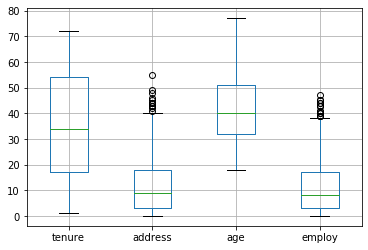

In [68]:
#Box-plots before removal of outliers
boxplot_0 = df[['tenure', 'address', 'age', 'employ']].boxplot()


In [179]:
#Box-plots after removal of outliers

# df_dropped = df.drop(index = remove_index)
# df.shape
boxplot_1 = df_dropped[['tenure', 'address', 'age', 'employ']].boxplot()


NameError: name 'df_dropped' is not defined

In [ ]:
df_dropped.shape

10. Frequently data is missing. Pick up 5 rows in the data set and delete the value for
address. Implement at least two approaches to fill in these values. Write down the
corresponding formulas/model and give motivation for your approach. If you use stan-
dard routines then check how exactly the data imputation is implemented. How would
you proceed if the value of the binary variable retire is missing? Implementation is
not required.

If we randomly delete 5 vars we it will be MAR case. SO we can use:
- cold imputation: the missing value is replaced with the value of the most similar observation;
- hot imputation: the missing value is replaced with some random but possible value
- regression imputation: the missing value is forecasted using some model (regression)
- mean imputation: the missing value is replaced with the mean of the observed values

In [ ]:
# Randomly drop 5 observations for 'address' var
# Create new column with name
df_dropped['address_dropped'] = df_dropped['address']

# Check the position of column 'address_dropped'
column_no = df_dropped.columns.get_loc('address_dropped')
column_no

In [ ]:
# Randomly drop 5 observations for 'address' var
#2. Drop random cells from column 'address_dropped'
for i in range(0,5):
    j = np.random.randint(951)
    df_dropped.iloc[[j], [column_no]] = np.nan
    

In [ ]:
# Quantity of dropped cells
df_dropped['address_dropped'].isna().sum()

In [ ]:
df_dropped.loc[df_dropped['address_dropped'].isna()]['address_dropped']

In [ ]:
na_rows = df_dropped.loc[df_dropped['address_dropped'].isna()].index

In [ ]:
na_rows 

In [ ]:
# Create list of vars for imputation
impute_comb = best_combination
impute_comb.remove('address')
impute_comb.append('address_dropped')
impute_comb

In [ ]:
# I Mean imputation¶
# the missing value is replaced with the mean of the observed values
# https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_dropped[impute_comb])
SimpleImputer()
df_impute1 = imp_mean.transform(df_dropped[impute_comb])

index1 = df_dropped[impute_comb].index.values.tolist()
df_impute1 = pd.DataFrame(data=df_impute1,    
                index=index1,
                columns=impute_comb)

# Replaced values by mean
df_impute1.loc[na_rows]

In [ ]:
# II Multivariate feature imputation¶
# the missing value is forecasted using some model (regression)
# https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=2, random_state=1)
imp.fit(df_dropped.drop(na_rows, axis=0)[impute_comb])

IterativeImputer(random_state=0)
X_test = df_dropped.loc[na_rows][impute_comb]
# # the model learns that the second feature is double the first
df_impute2 = imp.transform(X_test)

df_impute2 = pd.DataFrame(data=df_impute2,    
#                 index=index1,
                columns=impute_comb)

# # Replaced values by 
df_impute2

11. We consider now the model you have worked with so far and the model with original y if
you applied some transformation OR the model with log(y) if you have not transformed
y. Run an appropriate test to decide which of the models is superior. Explain, the
idea of the test and why you cannot make a similar decision using AIC/BIC, etc.

y i = x0iβ + δ ln (ln(ŷ)i − pred(ln yi) + ui ) - from page 293 // UCU slides 4-5



In [ ]:
# Create log of predicted variables from original model
best_combination = ['tenure', 'marital1', 'address', 'retire1', 'employ', 'age']
X = df_dropped[best_combination] 
y = df_dropped['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
df_dropped['predictions'] = model.predict(X)

# Create log of predictions
df_dropped['l_predictions'] = np.log(df_dropped['predictions'])

In [ ]:
#Create log of predicted varaible and run OLS on it
df_dropped['l_longmon'] = np.log(df_dropped['longmon'])

X = df_dropped[best_combination] 
y = df_dropped['l_longmon'] 
X = sm.add_constant(X) 

model_l = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
df_dropped['ln_predictions'] = model_l.predict(X)

In [ ]:
# Find difference between log of predictions from the first model and model runned on log(y)
df_dropped = df_dropped.fillna(0)
df_dropped['delta_ln']  = df_dropped['l_predictions'] - df_dropped['ln_predictions']


In [ ]:
# Run regression with this difference included

best_combination.append('delta_ln')
X = df_dropped[best_combination] 
best_combination.remove('delta_ln')
y = df_dropped['longmon'] 
X = sm.add_constant(X)
model_delta = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
model_delta.summary()

The coefficient under difference is  significant, so we can't reject H0, and should use logs(y) in OLS instead of y.

12. We compare the predictive ability of the estimated regression. Consider the model
you worked so far and the original model with the same y but without transformation
and selection of features. Compare the two models using leave-one-out CV and 5-fold
CV. Explain the idea of this technique with formulas and draw a conclusion about the
predictive ability of the models.

In [ ]:
explanatory_vars = ['tenure', 'age', 'address', 'income',  'employ',  'wiremon',  'retire1',  'marital1',  'gender1',  'churn1']

In [ ]:
# Initial model 
explanatory_vars = ['tenure', 'age', 'address', 'income',  'employ',  'wiremon',  'retire1',  'marital1',  'gender1',  'churn1']
X0 = df[explanatory_vars] 
y0 = df['longmon'] 
X0 = sm.add_constant(X0) 
model0 = sm.OLS(y0, X0.astype(float)).fit() ## sm.OLS(output, input)
# predictions = model0.predict(X0)
model0.summary()

In [ ]:
# Final model
X = df_dropped[best_combination] 
y = df_dropped['l_longmon'] 
X = sm.add_constant(X) 
model = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# X_train.shape, y_train.shape

# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)

from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

# https://scikit-learn.org/stable/modules/cross_validation.html
# https://stackoverflow.com/questions/48739198/valueerror-unknown-label-type-continuous-svc-sklearn

In [ ]:
from sklearn.model_selection import cross_val_score
clf = SVR(C=1.0, epsilon=0.2)
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X, y)

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(
    X0, y0, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

from sklearn.svm import SVR
svr = SVR()
svr.fit(X0_train, y0_train)
print(svr.score(X0_train, y0_train))
print(svr.score(X0_test, y0_test))

In [ ]:
explanatory_vars = df.columns.tolist()
remove = ['longmon','marital','ed','retire', 'gender', 'churn', 'ed_cat', 'pred',  'resid']

In [ ]:
for i in remove:
    explanatory_vars.remove(i)

In [ ]:
explanatory_vars =['tenure', 'age', 'address', 'income',  'employ',  'wiremon',  'retire1',  'marital1',  'gender1',  'churn1',  'wiremon_l']

In [ ]:
# F-test
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))

B = np.identity(len(model0.params))
B = B[1:,:]
print(model0.f_test(B))

F-test p-value of the final model is lower and the more is the evidence that this model has more explanatory power comparing to initial model.